In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import layers, models

In [25]:
(train_data, train_target), (test_data, test_target) = keras.datasets.mnist.load_data()
train_data = train_data.reshape(60000, 784).astype('float32') / 255
train_target = keras.utils.to_categorical(train_target, 10)
test_data = test_data.reshape(10000, 784).astype('float32') / 255
test_target = keras.utils.to_categorical(test_target, 10)

def run(model, batch_size = 256, number_of_iterations = 25, validation_split = 0.25):
  model.compile(optimizer="adam", loss="categorical_crossentropy")
  model.fit(train_data, train_target, batch_size = batch_size, epochs = number_of_iterations, validation_split = validation_split)
  loss = model.evaluate(test_data, test_target)
  print("Loss: " + str(loss))


In [26]:
model = models.Sequential([
    layers.Dense(784, input_dim= 28 * 28, activation='relu'),
    layers.Dense(200, activation='relu'),
    layers.Dense(250, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
run(model)

Epoch 1/25
176/176 [==============================] - 2s 8ms/step - loss: 0.3008 - val_loss: 0.1488
Epoch 2/25
176/176 [==============================] - 1s 7ms/step - loss: 0.1009 - val_loss: 0.0979
Epoch 3/25
176/176 [==============================] - 1s 6ms/step - loss: 0.0616 - val_loss: 0.0875
Epoch 4/25
176/176 [==============================] - 1s 7ms/step - loss: 0.0402 - val_loss: 0.0965
Epoch 5/25
176/176 [==============================] - 1s 6ms/step - loss: 0.0300 - val_loss: 0.0891
Epoch 6/25
176/176 [==============================] - 1s 6ms/step - loss: 0.0208 - val_loss: 0.0933
Epoch 7/25
176/176 [==============================] - 1s 6ms/step - loss: 0.0198 - val_loss: 0.1061
Epoch 8/25
176/176 [==============================] - 1s 7ms/step - loss: 0.0189 - val_loss: 0.0902
Epoch 9/25
176/176 [==============================] - 1s 6ms/step - loss: 0.0115 - val_loss: 0.1112
Epoch 10/25
176/176 [==============================] - 1s 7ms/step - loss: 0.0095 - val_loss: 0.1003

Real: 3
Predicted: 2


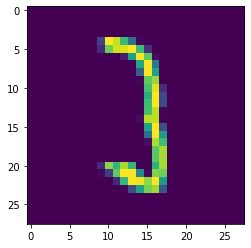

In [27]:
result_on_test = model.predict(test_data)
mismatches = np.where(np.array([np.argmax(result) for result in result_on_test]) - np.argmax(test_target, axis = 1) != 0)
random_choice = np.random.choice(mismatches[0])
one_mismatch = test_data[random_choice]
plt.imshow(one_mismatch.reshape(28, 28) * 255)
print("Real: " + str(np.argmax(test_target[random_choice])))
print("Predicted: " + str(np.array([np.argmax(result) for result in result_on_test])[random_choice]))

In [30]:
model = models.Sequential([
    layers.Dense(784, input_dim= 28 * 28, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
run(model, number_of_iterations = 2)

Epoch 1/2
176/176 [==============================] - 2s 6ms/step - loss: 0.3936 - val_loss: 0.1794
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.1277
Loss: 0.12769579887390137


In [31]:
model = models.Sequential([
    layers.Dense(784, input_dim= 28 * 28, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
run(model, number_of_iterations = 5)

Epoch 1/5
176/176 [==============================] - 2s 6ms/step - loss: 0.3741 - val_loss: 0.1781
Epoch 2/5
176/176 [==============================] - 1s 6ms/step - loss: 0.1414 - val_loss: 0.1412
Epoch 3/5
176/176 [==============================] - 1s 6ms/step - loss: 0.0924 - val_loss: 0.1044
Epoch 4/5
176/176 [==============================] - 1s 6ms/step - loss: 0.0664 - val_loss: 0.1024
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0743
Loss: 0.07428432255983353


In [33]:
model = models.Sequential([
    layers.Dense(784, input_dim= 28 * 28, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
run(model, number_of_iterations = 5, batch_size = 512)

Epoch 1/5
88/88 [==============================] - 1s 9ms/step - loss: 0.5425 - val_loss: 0.2541
Epoch 2/5
88/88 [==============================] - 1s 7ms/step - loss: 0.2002 - val_loss: 0.1754
Epoch 3/5
88/88 [==============================] - 1s 7ms/step - loss: 0.1365 - val_loss: 0.1362
Epoch 4/5
88/88 [==============================] - 1s 7ms/step - loss: 0.1029 - val_loss: 0.1213
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0975
Loss: 0.09747323393821716
